In [1]:
import numpy as np
import os
from netCDF4 import Dataset

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
import os, sys
module_path = os.path.abspath(os.path.join('C:/Users/Adam.000/Dropbox/Code/DisCo/'))
sys.path.append(module_path)
from visuals import *

In [3]:
matplotlib.use("TkAgg")
%matplotlib inline

In [4]:
mpl.rcParams['axes.linewidth'] = 3.0

### Reproduce the local causal state EWE field, for reference

In [5]:
lcsdir = "D:/Adam/Extracted-Disco-Data/IVT_alt/result-16/fields/"
lcsfiles = sorted(os.listdir(lcsdir))

In [6]:
lcs_fields = []

for i,s in enumerate(lcsfiles):
    s_field = np.load(lcsdir+s)
    lcs_fields.append(s_field)
state_field = np.vstack(lcs_fields)

In [7]:
np.shape(state_field)

(500, 768, 1152)

In [8]:
state_field = np.roll(state_field,576, axis=2)
filteredIVT = np.copy(state_field)
filteredIVT[state_field==13] = 0

In [9]:
maskedIVT = np.ma.masked_array(filteredIVT, filteredIVT==0)

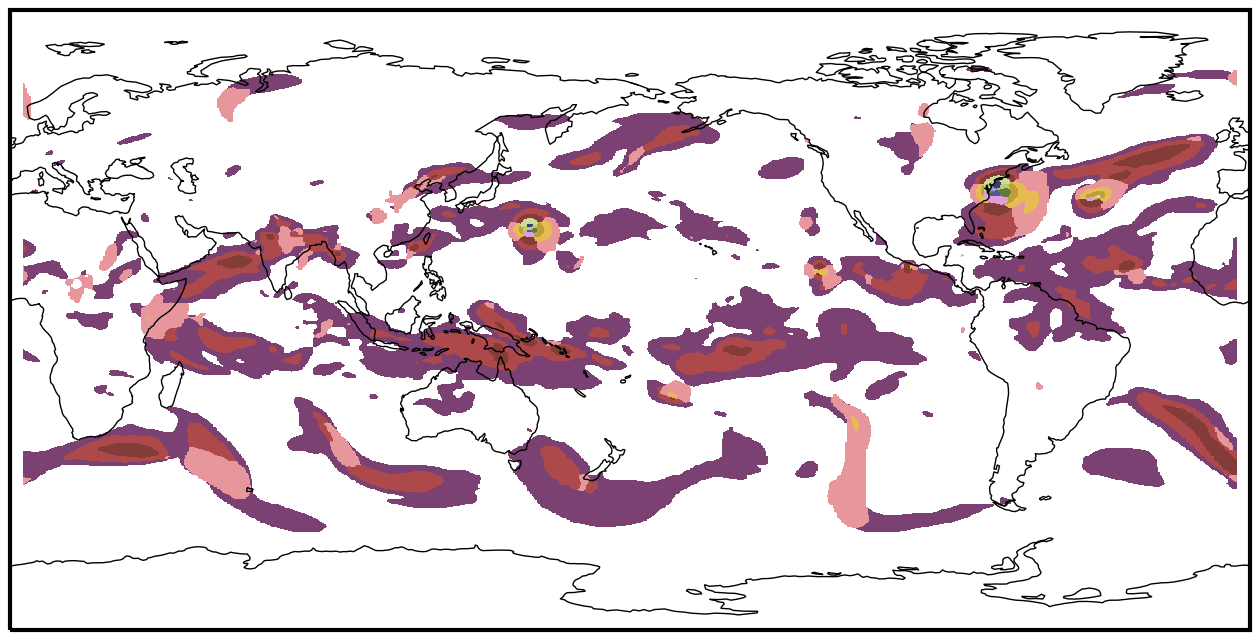

In [11]:
ind = 112

H,W = np.shape(maskedIVT[ind])
size = 16
fig = plt.figure(figsize = (size, (H/W)*size))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.0))
ax.imshow(maskedIVT[ind], transform=ccrs.PlateCarree(), cmap=plt.cm.tab20b, origin='lower')
ax.coastlines()
ax.tick_params(axis='both',
                        which='both',
                        bottom=False,
                        top=False,
                        left=False,
                        right=False,
                        labelleft=False,
                        labelbottom=False)

## Load and combine TECA segmentation fields, then overlay ontop of TMQ field

In [12]:
run_dir =  "D:/Adam/Extracted-Disco-Data/AR-Extracted-Data/netcdf_data/"
obs_fields = []
lcsdir =  "D:/Adam/Extracted-Disco-Data/IVT/result-8/fields/"
lcsfiles = sorted(os.listdir(lcsdir))

In [13]:
for (i,s) in enumerate(lcsfiles):
    index = i%8
    if index == 0:
        obs_name = s[4:-6]+'00000.nc'
        obs_name = obs_name[:43]+obs_name[44:46]+'2'+obs_name[47:]
        obs_load = Dataset(run_dir+obs_name, 'r')["TMQ"][:]
    obs_field = obs_load[index]
    obs_fields.append(obs_field)

In [14]:
field = np.stack(obs_fields)

In [15]:
np.shape(field)

(500, 768, 1152)

In [16]:
run_dir =  "D:/Adam/Extracted-Disco-Data/AR-Extracted-Data/netcdf_data/"
runfiles = sorted(os.listdir(run_dir))

tmq_fields = []
for file in runfiles:
    tmq = Dataset(run_dir+file, 'r')["TMQ"][:]
    tmq_fields.append(tmq)

field = np.vstack(tmq_fields)

In [17]:
np.shape(field)

(512, 768, 1152)

In [18]:
tecadir = "D:/Adam/Extracted-Disco-Data/TECA/TECA-BARD/"
tecafiles = sorted(os.listdir(tecadir))

In [19]:
teca_field = []
for (i,s) in enumerate(tecafiles):
    teca_prob = Dataset(tecadir+s, "r")["ar_probability"][:]
    teca_load = teca_prob >= 2.0/3.0
    teca_field.append(teca_load)
ar_field = np.vstack(teca_field)

In [20]:
np.shape(ar_field)

(504, 768, 1152)

In [21]:
tc_field = np.load("D:/Adam/Extracted-Disco-Data/TECA/TC/TC_seg_field.npy")

In [22]:
np.shape(tc_field)

(500, 768, 1152)

In [23]:
field = np.roll(field, 576, axis=2)
ar_field = np.roll(ar_field,576, axis=2)
tc_field = np.roll(tc_field, 576, axis=2)

In [24]:
masked_ars = np.ma.masked_array(ar_field, ar_field==0)
masked_tcs = np.ma.masked_array(tc_field, tc_field==0)

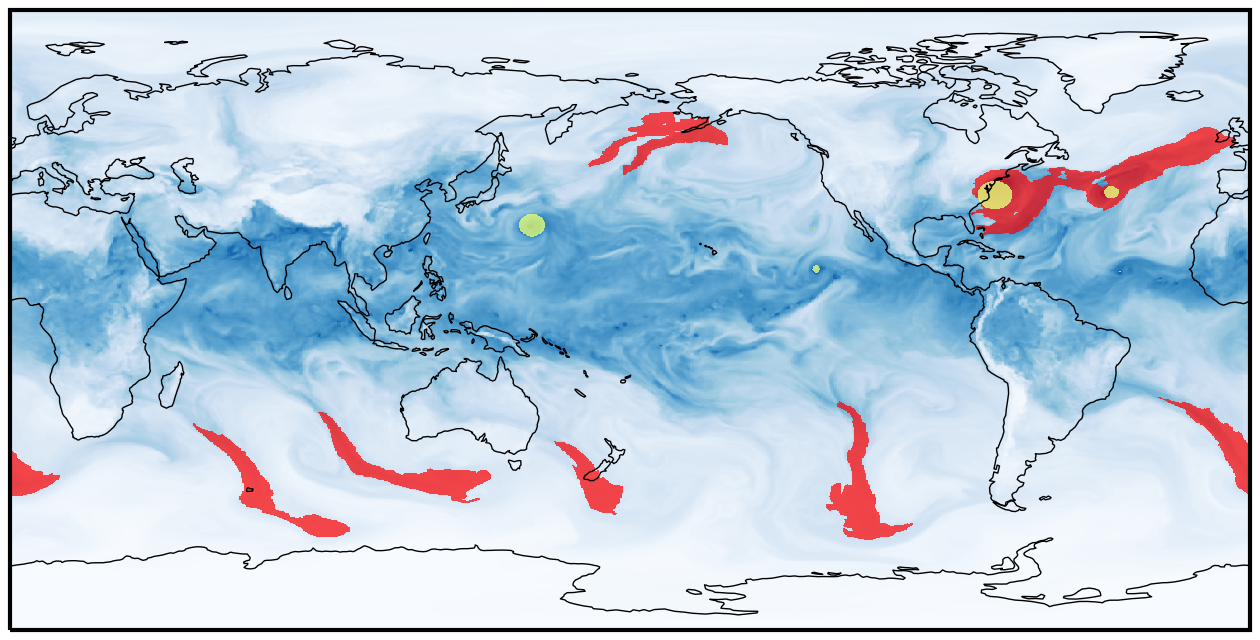

In [25]:
H,W = np.shape(field[112])
size = 16
fig = plt.figure(figsize = (size, (H/W)*size))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.0))
ax.imshow(field[112], transform=ccrs.PlateCarree(), cmap=plt.cm.Blues, origin='lower')
ax.imshow(masked_ars[112], transform=ccrs.PlateCarree(), cmap=plt.cm.autumn, origin='lower', alpha=0.7)
ax.imshow(masked_tcs[106], transform=ccrs.PlateCarree(), cmap=plt.cm.Wistia, origin='lower', alpha=0.8)
ax.coastlines()
ax.tick_params(axis='both',
                        which='both',
                        bottom=False,
                        top=False,
                        left=False,
                        right=False,
                        labelleft=False,
                        labelbottom=False)
# plt.savefig('teca_seg.pdf', bbox_inches='tight')

### demonstrate TECA AR false-positive identifying a TC as an AR

In [26]:
datadir = "D:/Adam/Extracted-Disco-Data/TECA/TECA-BARD/TECA_BARD_CAM5-1-0.25degree_All-Hist_est1_v3_run1.cam2.h4.2015-09-04-00Z.nc"
teca = Dataset(datadir, 'r')
ar_prob = teca["ar_probability"][:]
ars = ar_prob >= 2.0/3.0

In [27]:
np.shape(ars)

(8, 768, 1152)

In [28]:
datadir = "D:/Adam/Extracted-Disco-Data/AR-Extracted-Data/netcdf_data/CAM5-1-0.25degree_All-Hist_est1_v3_run1.cam.h2.2015-09-04-00000.nc"
obs = Dataset(datadir, 'r')
tmq = obs["TMQ"][:]

In [29]:
np.shape(tmq)

(8, 768, 1152)

In [30]:
ars = np.roll(ars,576, axis=2)
tmq = np.roll(tmq,576, axis=2)

In [31]:
masked_ars = np.ma.masked_array(ars, ars==0)

In [32]:
field = np.load("D:/Adam/Extracted-Disco-Data/TECA/track_0_seg_mask_test.npy")

In [33]:
np.shape(field)

(134, 1152, 768)

In [34]:
masked_tcs = np.ma.masked_array(field, field==0)

In [35]:
masked_tcs = np.roll(masked_tcs,576, axis=1)

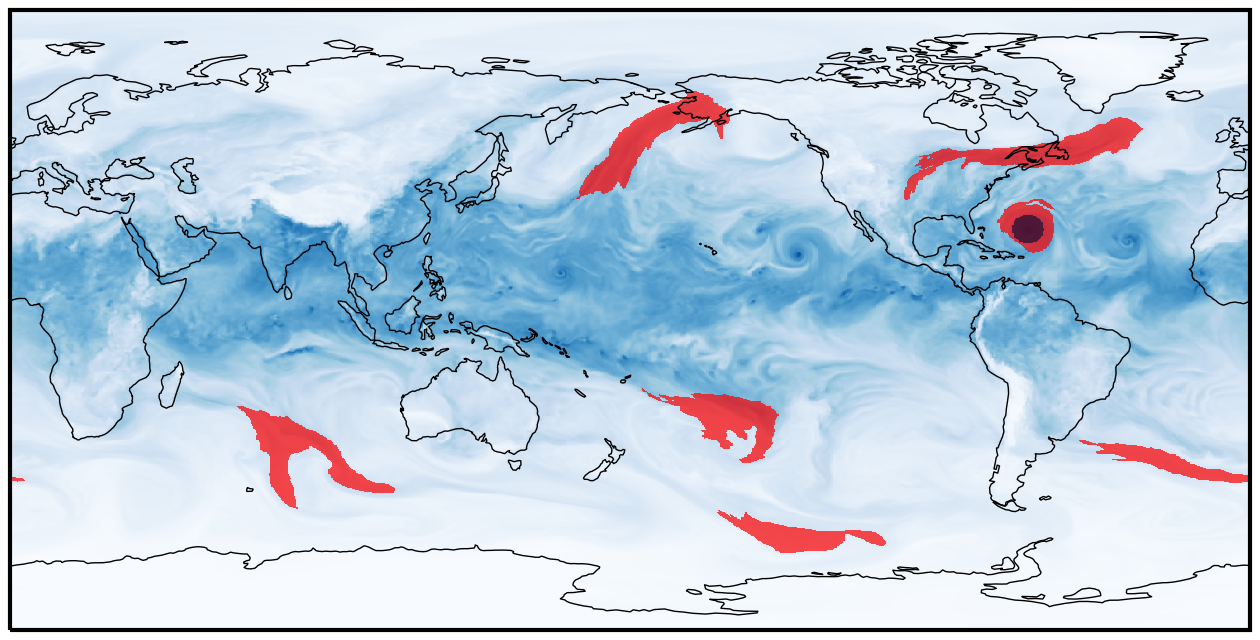

In [36]:
H,W = np.shape(field[112])
size = 16
fig = plt.figure(figsize = (size, (H/W)*size))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.0))
ax.imshow(tmq[0], transform=ccrs.PlateCarree(), cmap=plt.cm.Blues, origin='lower')
ax.imshow(masked_ars[0], transform=ccrs.PlateCarree(), cmap=plt.cm.autumn, origin='lower', alpha=0.7)
ax.imshow(masked_tcs[80].T, transform=ccrs.PlateCarree(), cmap=plt.cm.twilight_shifted, origin='lower', alpha=0.8)
ax.coastlines()
ax.tick_params(axis='both',
                        which='both',
                        bottom=False,
                        top=False,
                        left=False,
                        right=False,
                        labelleft=False,
                        labelbottom=False)
# plt.savefig('teca_false.pdf', bbox_inches='tight')